In [166]:
import cifar10
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [167]:
cifar10.data_path = "data/CIFAR-10/"

In [168]:
class_names = cifar10.load_class_names()
class_names

Loading data: data/CIFAR-10/cifar-10-batches-py/batches.meta


['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [169]:
images_train, cls_train, labels_train = cifar10.load_training_data()
images_test, cls_test, labels_test = cifar10.load_test_data()

Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_1
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_2
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_3
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_4
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_5
Loading data: data/CIFAR-10/cifar-10-batches-py/test_batch


In [186]:
images_train.shape[0], images_test.shape

(50000, (10000, 32, 32, 3))

In [171]:
images_train_data = images_train.reshape(50000, 3072)
images_test_data = images_test.reshape(1000, 3072)

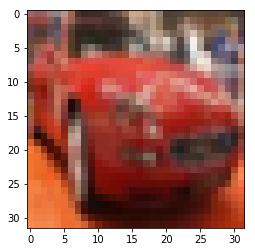

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

In [172]:
i = 0
first_image = images_test[5]
first_image = first_image.reshape(32,32,3)
plt.imshow(first_image)
plt.show()
labels_test[i]

In [173]:
n_input = 3072
n_hidden_1 = 256
n_hidden_2 = 256
n_classes = 10

weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}

biases = {
    'h1': tf.Variable(tf.random_normal([n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}


In [174]:
tf.trainable_variables()

[<tf.Variable 'Variable:0' shape=(784, 256) dtype=float32_ref>,
 <tf.Variable 'Variable_1:0' shape=(256, 256) dtype=float32_ref>,
 <tf.Variable 'Variable_3:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'Variable_4:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'Variable_6:0' shape=(3072, 256) dtype=float32_ref>,
 <tf.Variable 'Variable_7:0' shape=(256, 256) dtype=float32_ref>,
 <tf.Variable 'Variable_9:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'Variable_10:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'Variable_12:0' shape=(3072, 256) dtype=float32_ref>,
 <tf.Variable 'Variable_13:0' shape=(256, 256) dtype=float32_ref>,
 <tf.Variable 'Variable_15:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'Variable_16:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'Variable_18:0' shape=(3072, 256) dtype=float32_ref>,
 <tf.Variable 'Variable_19:0' shape=(256, 256) dtype=float32_ref>,
 <tf.Variable 'Variable_20:0' shape=(256, 10) dtype=float32_ref>,
 <tf.Variable 'Variable_21

In [175]:
def forward_propagation(x, weights, biases):
    in_layer1 = tf.add(tf.matmul(x, weights['h1']), biases['h1'])
    out_layer_1 = tf.nn.relu(in_layer1)
    
    in_layer2 = tf.add(tf.matmul(out_layer_1, weights['h2']), biases['h2'])
    out_layer_2 = tf.nn.relu(in_layer2)
    
    in_output_layer = tf.add(tf.matmul(out_layer_2, weights['out']), biases['out'])
    output = in_output_layer
    return output

In [176]:
x = tf.placeholder("float", [None, n_input])
y = tf.placeholder(tf.int32, [None, n_classes])

In [177]:
pred = forward_propagation(x, weights, biases)

In [178]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = pred, labels = y))

In [179]:
optimizer = tf.train.AdamOptimizer(learning_rate = 0.0001)
optimize_step = optimizer.minimize(cost)

In [180]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [181]:
labels_train.shape

(50000, 10)

In [182]:
def next_batch(num, data, labels):
    '''
    Return a total of `num` random samples and labels. 
    '''
    idx = np.arange(0 , len(data))
    np.random.shuffle(idx)
    idx = idx[:num]
    data_shuffle = [data[ i] for i in idx]
    labels_shuffle = [labels[ i] for i in idx]

    return np.asarray(data_shuffle), np.asarray(labels_shuffle)


In [183]:
batch_size = 100
for i in range(500):
    num_batches = int(images_train.shape[0]/batch_size)
    total_cost = 0
    for j in range(num_batches):
        batch_x, batch_y = next_batch(batch_size, images_train_data, labels_train)
        c, _ = sess.run([cost, optimize_step], feed_dict={x:batch_x, y:batch_y})
        total_cost += c
    print(total_cost)

736959.8649291992
452078.84912109375
365859.27966308594
312135.08114624023
275182.1016845703
245824.63906860352
223586.11987304688
208009.39251708984
193545.93377685547
180737.7113494873
169681.02465820312
160753.33476257324
151904.28630065918
146104.98889160156
139315.02922058105
132570.18141174316
127786.57618713379
121710.29806518555
117354.6385345459
113528.88697814941
108720.6838684082
103996.30952453613
100326.3547668457
97388.91668701172
93981.83137512207
90893.91569519043
87850.3480758667
84923.59317779541
82232.43190765381
79745.46172332764
77623.12432098389
75418.44673919678
73622.09477233887
71372.04001617432
69370.96605682373
67345.97704315186
65365.9772644043
63352.232734680176
61205.5260848999
59877.03372192383
58440.759284973145
57120.79959869385
55577.41198730469
54270.499588012695
52740.2575378418
51630.936126708984
50740.76919555664
49370.91077041626
48437.793312072754
47044.718353271484
45720.386837005615
44555.73543548584
43840.61142349243
42374.50129318237
41431.64

779.5103403329849
736.5576702356339
756.3894627094269
752.7203047275543
745.2577791810036
747.9117761254311
734.646238386631
754.0663526058197
759.6040073633194
726.7092886567116
751.9581448435783
763.2030681371689
735.2379921674728
752.0552553534508
727.2741221785545
741.6719190478325
743.2474177479744
730.8148131370544
742.5229551792145
749.2023203372955
749.4957213401794
730.0256298780441
740.7208918333054
729.4130061268806
723.257229924202
727.2021750211716
729.0477206707001
718.9152627587318
722.1609759926796
732.3158451318741
719.1196660399437
727.8566791415215
738.4468650221825
730.4571839570999
725.3524497747421
721.8810799717903
726.9175161123276
713.3958929777145
728.9743957519531
718.0314966440201
729.2612558603287
718.1677954792976
744.1357151269913
713.8253096342087
717.6197290420532
720.2231311202049
723.9288195967674
705.2291243076324
715.9676344394684
726.0651197433472
703.8920182585716
712.1813262104988
721.8068741559982


In [184]:
predictions = tf.argmax(pred, axis = 1)
actual_labels = tf.argmax(y, axis = 1)
correct_predictions = tf.equal(predictions,actual_labels)

correct_preds = sess.run(correct_predictions, feed_dict={x:images_train_data, y:labels_train} )
correct_preds.sum()

26698

In [185]:
labels_train.shape

(50000, 10)